## Bezierkurven: Eine grafische Einführung

In diesem Notizbuch tauchen wir in die faszinierende Welt der Bezierkurven ein. Bezierkurven sind ein grundlegendes Werkzeug in Computergrafik, CAD-Systemen und im Design, da sie es ermöglichen, glatte Kurven mithilfe einer begrenzten Anzahl von Steuerpunkten zu beschreiben.

### Hintergrund

Benoît Bézier, ein Ingenieur bei Renault, popularisierte diese Kurven in den 1960er Jahren, obwohl sie bereits vorher von Paul de Casteljau entwickelt wurden. Das Hauptmerkmal von Bezierkurven ist, dass sie immer innerhalb der konvexen Hülle ihrer Steuerpunkte liegen. Dies macht sie besonders geeignet für Design- und Animationsanwendungen, da sie einfach zu steuern sind und vorhersehbare Ergebnisse liefern.

### Ziele

1. **Definition von Bezierkurven:** Wir stellen die mathematische Grundlage von Bezierkurven vor und erklären, wie sie aus Steuerpunkten generiert werden.
2. **Visualisierung:** Mithilfe von Python und Matplotlib werden wir Bezierkurven für verschiedene Steuerpunkte zeichnen und visualisieren.
3. **Von Bezier zu B-Splines:** Wir erweitern unser Wissen und führen B-Splines ein, die eine Erweiterung von Bezierkurven sind und noch mehr Flexibilität in der Kurvengestaltung bieten.
4. **Lineare Interpolation:** Als Vergleich zeigen wir auch, wie eine einfache lineare Interpolation zwischen zwei Punkten aussieht.

### Übersicht über das Beispiel

- **Bezierkurven-Definition:** Anhand von gegebenen Steuerpunkten berechnen und visualisieren wir eine Bezierkurve.
- **B-Splines:** Wir führen die B-Spline-Kurve ein und zeigen, wie sie sich im Vergleich zu Bezierkurven verhält.
- **Lineare Interpolation:** Ein einfacher linearer Pfad zwischen dem Start- und Endpunkt wird als Referenz gezeichnet.

Am Ende dieses Notizbuchs werden Sie ein tieferes Verständnis für Bezierkurven und B-Splines haben und ihre praktische Anwendung in grafischen und Designkontexten besser schätzen.

Zunächst die Lineare Interpolation:

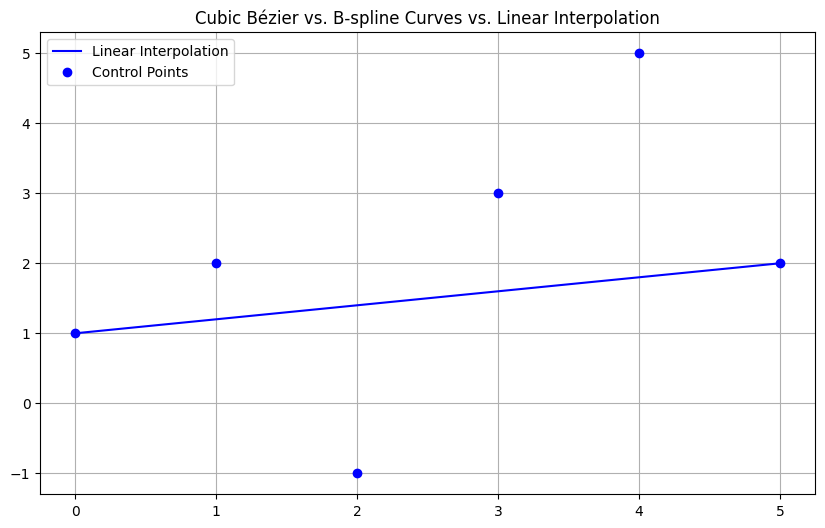

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 

def linear_interpolation(t, P0, P1):
    """Calculate point using linear interpolation."""
    return (1 - t) * P0 + t * P1

# Define control points
P = [np.array([0, 1]), np.array([1, 2]), np.array([2, -1]), np.array([3, 3]), np.array([4, 5]), np.array([5, 2])]

# Generate curve points
t_values = np.linspace(0, 1, 100)
linear_points = np.array([linear_interpolation(t, P[0], P[-1]) for t in t_values])

# Plot curves and control points
plt.figure(figsize=(10, 6))
plt.plot(linear_points[:, 0], linear_points[:, 1], 'b-', label='Linear Interpolation')
plt.plot([p[0] for p in P], [p[1] for p in P], 'bo', label='Control Points')
plt.legend()
plt.grid()
plt.title('Cubic Bézier vs. B-spline Curves vs. Linear Interpolation')
plt.show()

Jetzt erweitert mit Bezier Kurven:

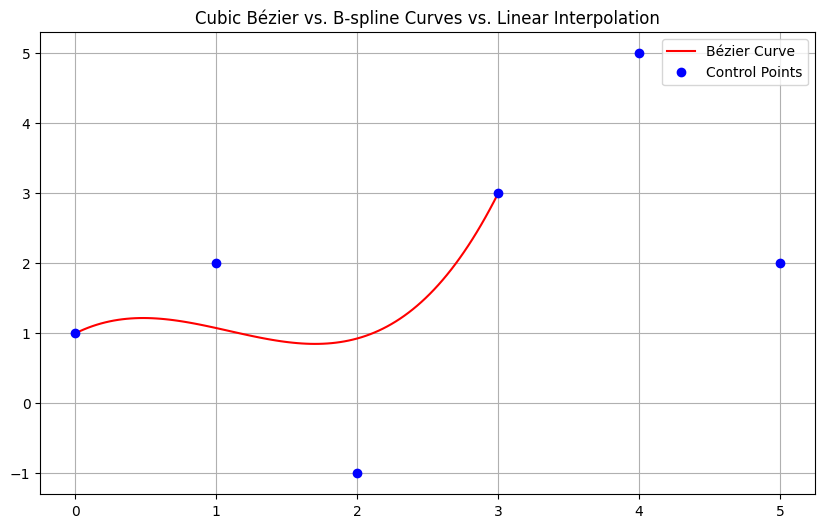

In [5]:
def bezier(t, P0, P1, P2, P3):
    """Calculate point on cubic Bézier curve."""
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

# Generate curve points

bezier_points = np.array([bezier(t, *P[:4]) for t in t_values])


# Plot curves and control points
plt.figure(figsize=(10, 6))
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'r-', label='Bézier Curve')
# plt.plot(linear_points[:, 0], linear_points[:, 1], 'b', label='Linear Interpolation')
plt.plot([p[0] for p in P], [p[1] for p in P], 'bo', label='Control Points')
plt.legend()
plt.grid()
plt.title('Cubic Bézier vs. B-spline Curves vs. Linear Interpolation')
plt.show()

Schließlich ein Beipspiel mit B-Splines

uniform clamped knot vector [0 0 0 0 1 2 3 3 3 3]
non-uniform knot vector [0 0 0 0 2 2 3 3 3 3]


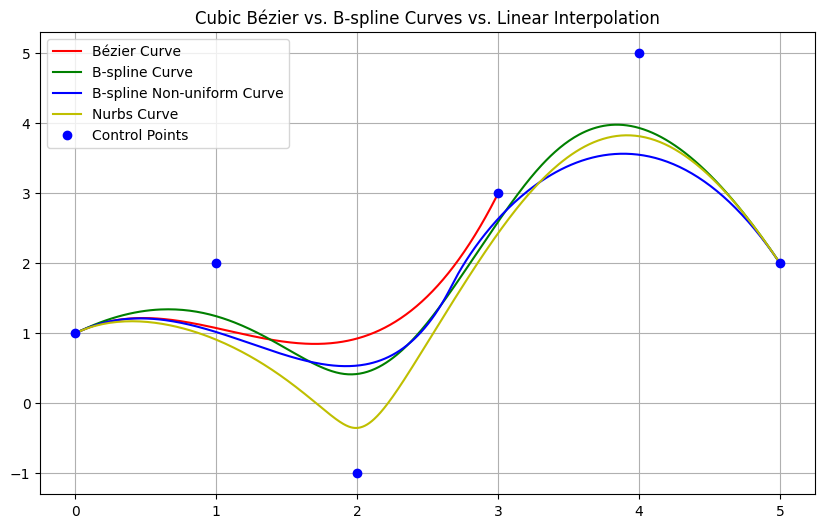

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math 
def bezier(t, P0, P1, P2, P3):
    """Calculate point on cubic Bézier curve."""
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

def bspline_basis(i, k, t, knots):
    """
    Compute the B-spline basis function value using Cox-de Boor's algorithm.

    Parameters:
        i: control point index
        k: spline degree
        t: parameter value
        knots: knot vector

    Returns:
        B-spline basis value.
    """
    if k == 0:
        return 1.0 if knots[i] <= t < knots[i + 1] else 0.0
    else:
        coeff1 = (t - knots[i]) / (knots[i + k] - knots[i]) if (knots[i + k] - knots[i]) != 0 else 0
        coeff2 = (knots[i + k + 1] - t) / (knots[i + k + 1] - knots[i + 1]) if (knots[i + k + 1] - knots[i + 1]) != 0 else 0

        return coeff1 * bspline_basis(i, k - 1, t, knots) + coeff2 * bspline_basis(i + 1, k - 1, t, knots)

def generate_knot_vector(n, degree, non_uniform=False):
    """Generate a clamped knot vector for B-splines."""
    if non_uniform:
        knots = np.concatenate(([0]*(degree+1), [2]*(n-degree-1) , [n-degree]*(degree+1))) # example: weight middle point 2 more
    else:
        knots = np.concatenate(([0]*(degree), np.arange(n-degree+1), [n-degree]*(degree)))
        #[0, 0, 0, 0, 1, 2, 3, 3, 3, 3]
    return knots


def bspline(t, control_points, degree=3, non_uniform=False):
    """
    Evaluate a B-spline at a parameter t.

    Parameters:
        t: parameter value
        control_points: list of control points
        degree: spline degree

    Returns:
        Point on the B-spline curve.
    """
    n = len(control_points)
    if t <= 0:
        return control_points[0]
    if t == 1:
        return control_points[-1]
    t = t * (n - degree )
    t = min(max(t, 0), n - degree)  # Clamp t
    k = degree
    knots = generate_knot_vector(n, degree, non_uniform)
    point = np.zeros(2)
    for i in range(n):
        point += np.array(control_points[i]) * bspline_basis(i, k, t, knots)
    return point

def nurbs(t, control_points, weights, degree=3):
    n = len(control_points)
    if t <= 0:
        return control_points[0]
    if t == 1:
        return control_points[-1]
    t = t * (n - degree )
    t = min(max(t, 0), n - degree)  # Clamp t
    k = degree
    knots = generate_knot_vector(n, degree)
    point = np.zeros(2)
    w = 0
    for i in range(n):
        basis = bspline_basis(i, k, t, knots)
        point += np.array(control_points[i]) * basis * weights[i]
        w += basis * weights[i]
    return point / w
          
def linear_interpolation(t, P0, P1):
    """Calculate point using linear interpolation."""
    return (1 - t) * P0 + t * P1

# Define control points
P = [np.array([0, 1]), np.array([1, 2]), np.array([2, -1]), np.array([3, 3]), np.array([4, 5]), np.array([5, 2])]
weights = [1,1,3,1,1,1]
# Generate curve points
t_values = np.linspace(0, 1, 400)
bezier_points = np.array([bezier(t, *P[:4]) for t in t_values])
bspline_points = np.array([bspline(t, P) for t in t_values])
print("uniform clamped knot vector", generate_knot_vector(len(P), 3, False))
bspline_points_non_uniform = np.array([bspline(t, P,degree=3, non_uniform=True) for t in t_values])
print("non-uniform knot vector", generate_knot_vector(len(P), 3, True))
linear_points = np.array([linear_interpolation(t, P[0], P[-1]) for t in t_values])
nurbs_points = np.array([nurbs(t, P, weights,degree=3) for t in t_values])
# Plot curves and control points
plt.figure(figsize=(10, 6))
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'r-', label='Bézier Curve')
plt.plot(bspline_points[:, 0], bspline_points[:, 1], 'g-', label='B-spline Curve')
plt.plot(bspline_points_non_uniform[:, 0], bspline_points_non_uniform[:, 1], 'b-', label='B-spline Non-uniform Curve')
plt.plot(nurbs_points[:, 0], nurbs_points[:, 1], 'y-', label='Nurbs Curve')
plt.plot([p[0] for p in P], [p[1] for p in P], 'bo', label='Control Points')
plt.legend()
plt.grid()
plt.title('Cubic Bézier vs. B-spline Curves vs. Linear Interpolation')
plt.show()